# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [167]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [168]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [169]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp-273.15,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # Handle exceptions
    except KeyError:
        print(f"KeyError encountered for city: {city}. Skipping...")
        pass
    except Exception as e:
        print(f"An error occurred for city: {city}. Skipping... Error: {str(e)}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nova sintra
Processing Record 2 of Set 1 | munirabad
Processing Record 3 of Set 1 | cabo san lucas
Processing Record 4 of Set 1 | college
Processing Record 5 of Set 1 | lerwick
Processing Record 6 of Set 1 | bakchar
Processing Record 7 of Set 1 | port mathurin
Processing Record 8 of Set 1 | lashio
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | lingig
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | falenki
Processing Record 13 of Set 1 | kapuskasing
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | wailua homesteads
Processing Record 16 of Set 1 | benguela
Processing Record 17 of Set 1 | flying fish cove
Processing Record 18 of Set 1 | constantia
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | zaozersk
Processing Record 21 of Set 1 | dryden
Processing Record 22 of Set 1 | horseheads
Processing

In [170]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [171]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nova sintra,14.8667,-24.7167,23.51,75,0,6.19,CV,1712607310
1,munirabad,15.3333,76.3333,29.75,40,88,3.48,IN,1712607035
2,cabo san lucas,22.8909,-109.9124,24.61,68,75,1.79,MX,1712607311
3,college,64.8569,-147.8028,0.97,71,40,2.06,US,1712607065
4,lerwick,60.1545,-1.1494,8.00,79,100,7.26,GB,1712607144


In [172]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [173]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nova sintra,14.8667,-24.7167,23.51,75,0,6.19,CV,1712607310
1,munirabad,15.3333,76.3333,29.75,40,88,3.48,IN,1712607035
2,cabo san lucas,22.8909,-109.9124,24.61,68,75,1.79,MX,1712607311
3,college,64.8569,-147.8028,0.97,71,40,2.06,US,1712607065
4,lerwick,60.1545,-1.1494,8.00,79,100,7.26,GB,1712607144


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

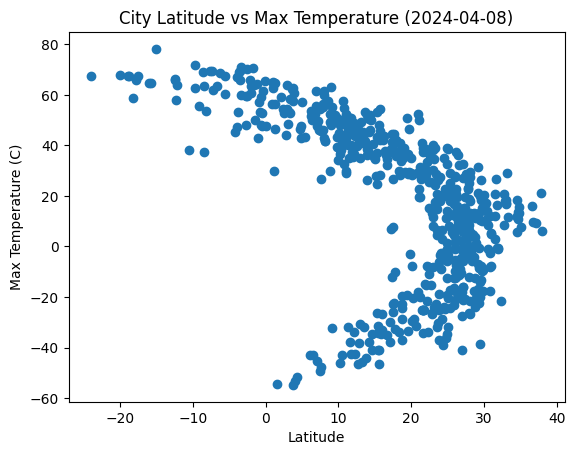

In [174]:
date_time = datetime.date(datetime.now())

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs Max Temperature ({date_time})")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

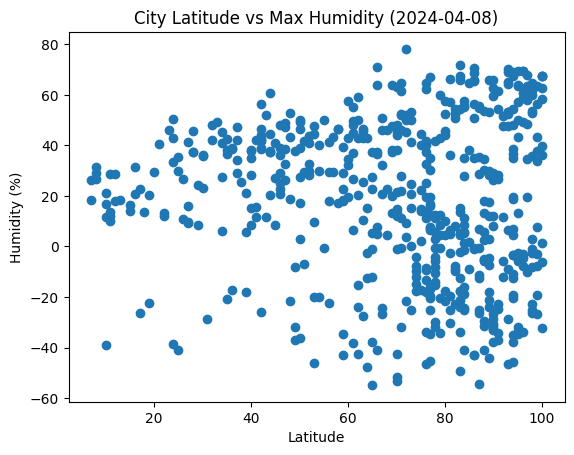

In [175]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Max Humidity ({date_time})")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

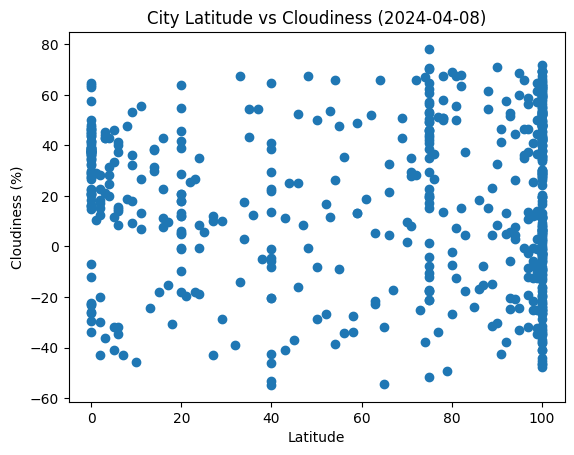

In [176]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({date_time})")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

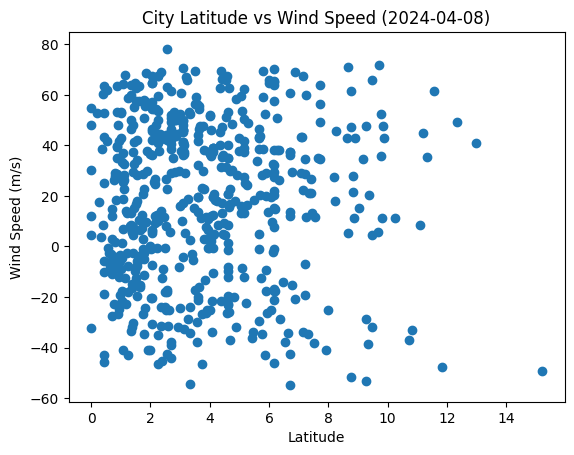

In [177]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs Wind Speed ({date_time})")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [178]:
# Define a function to create Linear Regression plots
def linear_regression(x, y, eqn_coordinates):
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    print(f"The r-value is: {rvalue}")
    regress_values = slope * x + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, xy=(0.2, 0.03), xycoords='figure fraction', fontsize=9, color='red', bbox=dict(boxstyle='round', facecolor='white', edgecolor='red', alpha=0.5), ha='center', va='center')
    plt.scatter(x, y)
    plt.xlabel(x.name)
    plt.ylabel(y.name)


In [179]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nova sintra,14.8667,-24.7167,23.51,75,0,6.19,CV,1712607310
1,munirabad,15.3333,76.3333,29.75,40,88,3.48,IN,1712607035
2,cabo san lucas,22.8909,-109.9124,24.61,68,75,1.79,MX,1712607311
3,college,64.8569,-147.8028,0.97,71,40,2.06,US,1712607065
4,lerwick,60.1545,-1.1494,8.00,79,100,7.26,GB,1712607144


In [180]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,port mathurin,-19.6833,63.4167,26.78,81,21,4.63,MU,1712607139
10,arraial do cabo,-22.9661,-42.0278,25.92,83,0,4.63,BR,1712607312
15,benguela,-12.5763,13.4055,25.96,87,99,1.50,AO,1712607313
16,flying fish cove,-10.4217,105.6791,26.82,78,75,4.12,CX,1712607313
18,puerto ayora,-0.7393,-90.3518,31.98,78,24,3.99,EC,1712607038


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.863452909250942


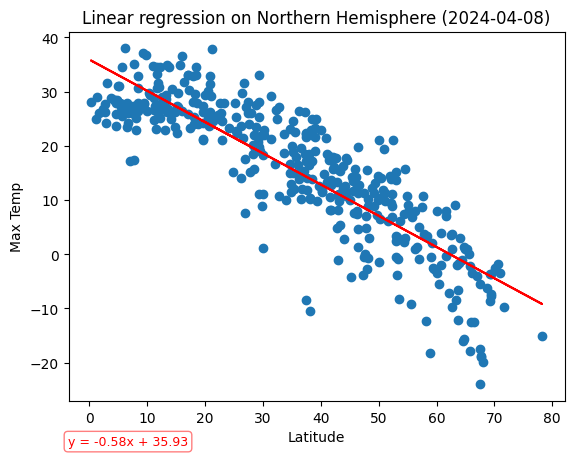

In [181]:
# Linear regression on Northern Hemisphere
plt.title(f"Linear regression on Northern Hemisphere ({date_time})")
linear_regression(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, -30))

The r-value is: 0.7583540286686085


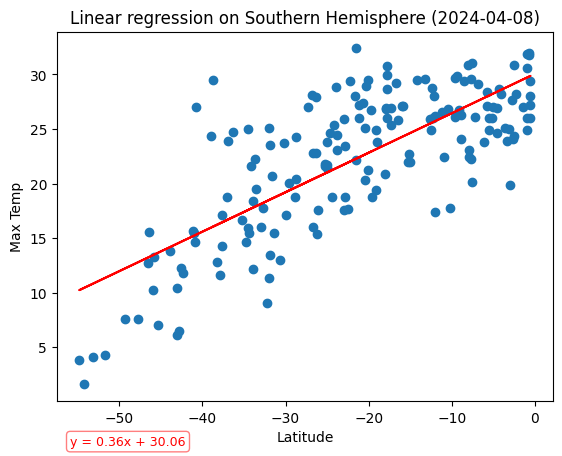

In [182]:
# Linear regression on Southern Hemisphere
plt.title(f"Linear regression on Southern Hemisphere ({date_time})")
linear_regression(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-30, 8))

**Discussion about the linear relationship:** 
These two linear regression plots show how the max temperatures are higher the closer to the equator (Or the closer to Latitude 0), and the farther away from the equator the lower the max temperatures.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.25302121924837806


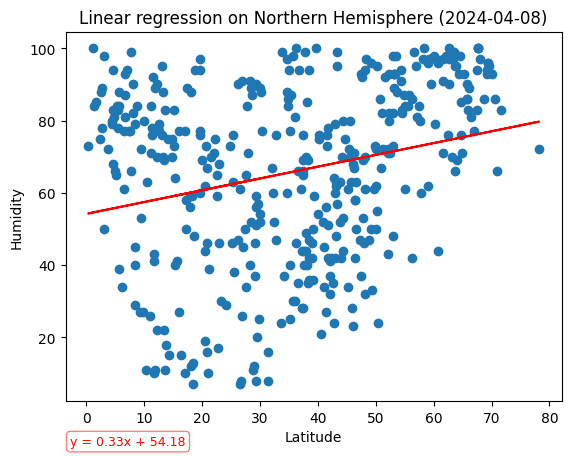

In [183]:
# Northern Hemisphere
plt.title(f"Linear regression on Northern Hemisphere ({date_time})")
linear_regression(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (50, 40))

The r-value is: 0.1855956765448569


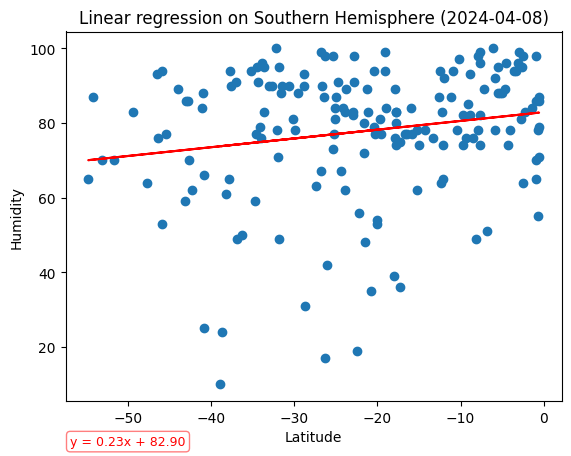

In [184]:
# Southern Hemisphere
plt.title(f"Linear regression on Southern Hemisphere ({date_time})")
linear_regression(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-20, 50))

**Discussion about the linear relationship:**
The behavior of humidity in the Northern and Southern hemispheres vary from the hemisphere. 
In both hemispheres the farther away from the equator the levels of humidity are more scarce, and the closer to the equator the more humidity there is.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1544779401838651


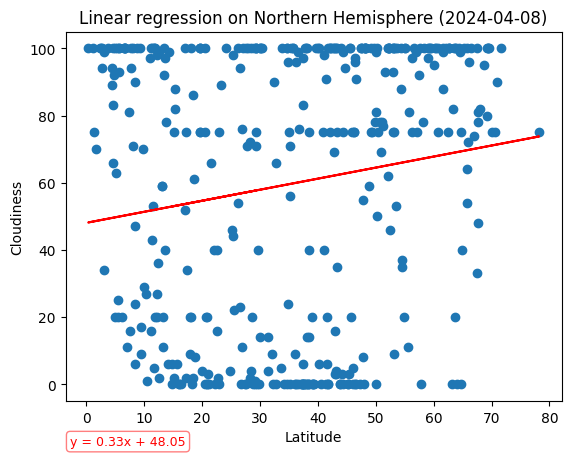

In [185]:
# Northern Hemisphere
plt.title(f"Linear regression on Northern Hemisphere ({date_time})")
linear_regression(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (50, 40))

The r-value is: 0.17168402190957446


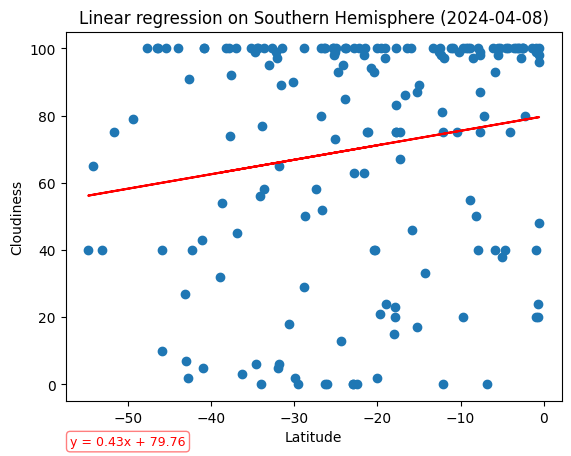

In [186]:
# Southern Hemisphere
plt.title(f"Linear regression on Southern Hemisphere ({date_time})")
linear_regression(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-20, 50))

**Discussion about the linear relationship:** 
Based on the data and the linear relationships, it seems there's more clouds in the northern hemisphere than the southern one. There also appears to be more cloudy the closer to the equator. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.017821110055604442


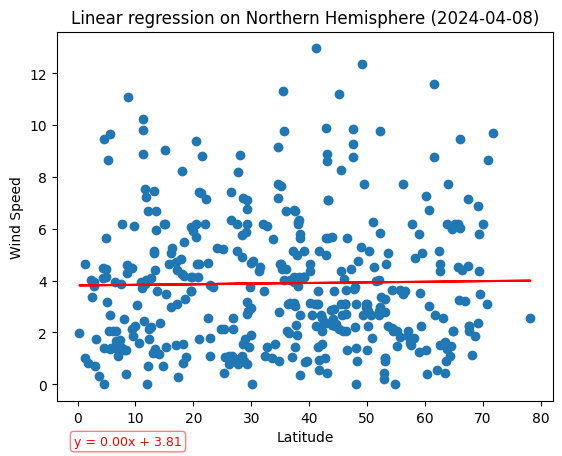

In [187]:
# Northern Hemisphere
plt.title(f"Linear regression on Northern Hemisphere ({date_time})")
linear_regression(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (50, 40))

The r-value is: -0.36979597962366806


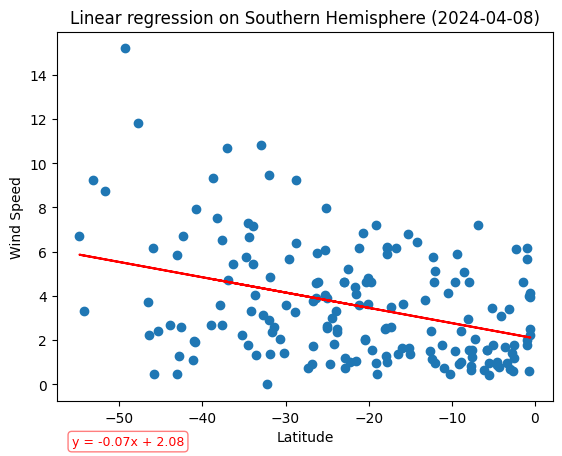

In [188]:
# Southern Hemisphere
plt.title(f"Linear regression on Southern Hemisphere ({date_time})")
linear_regression(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-20, 50))

**Discussion about the linear relationship:** 
Interestingly enough, there seems to be more data of wind speed towards the middle section (Latitudes 30-40) than on the outer latitudes (0, 50). The closer to the equator seems to have slower winds though. 